In [68]:
import urllib.request
import tarfile
import os
from pylab import *
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from io import StringIO 
import pydot
from IPython.display import Image
from sklearn import tree

In [69]:
def get_data_and_target(df, features, target):
    return {"data":df[features],"target":df[target]}

In [70]:
def train_test_split_pd(data, target, test_size):
    mask = np.random.rand(len(data)) < test_size
    return data[mask], data[~mask], target[mask], target[~mask]

In [71]:
df0 = pd.read_csv("data/BK_final.csv", index_col=0)

In [72]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,125,150,200,State,CountyName,rent0,rent1,rent2,rent3,rent4
0,90,11221,2011,27089,4485,2010,1894,1755,1740,1188,...,901,693,228,36,Kings County,1040,1110,1250,1550,1720
1,144,11216,2011,22274,3253,1734,1255,1175,1273,1220,...,767,571,404,36,Kings County,1040,1110,1250,1550,1720
2,32,11233,2011,25595,5154,2182,1626,1274,1405,1226,...,808,536,518,36,Kings County,1040,1110,1250,1550,1720
3,30,11213,2011,23257,4364,2028,1668,1239,1487,1060,...,604,516,234,36,Kings County,1040,1110,1250,1550,1720
4,14,11212,2011,30024,6678,3026,2311,1908,2227,1770,...,401,465,175,36,Kings County,1040,1110,1250,1550,1720


In [73]:
df0.columns

Index(['trips', 'ZIP', 'year', 'total', '0', '10', '15', '20', '25', '30',
       '35', '40', '45', '50', '60', '75', '100', '125', '150', '200', 'State',
       'CountyName', 'rent0', 'rent1', 'rent2', 'rent3', 'rent4'],
      dtype='object')

In [74]:
features = ['0', '10', '15', '20', '25', '30', '35', '40', '45', '50', '60', '75', '100', '125', '150', '200', 'rent0', 'rent1', 'rent2', 'rent3', 'rent4']
target = "trips"

In [75]:
temp = get_data_and_target(df0, features, target)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp["data"], temp["target"], 0.8)

In [77]:
def fit_tree(X, y, depth=10):
    ##: Using the DecisionTreeRegressor, train a model to depth 10.
    decision_tree = tree.DecisionTreeRegressor(max_depth=depth)
    return decision_tree.fit(X,y)

def display_tree(tmodel):
    dot_data = StringIO() 
    tree.export_graphviz(tmodel, out_file=dot_data) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

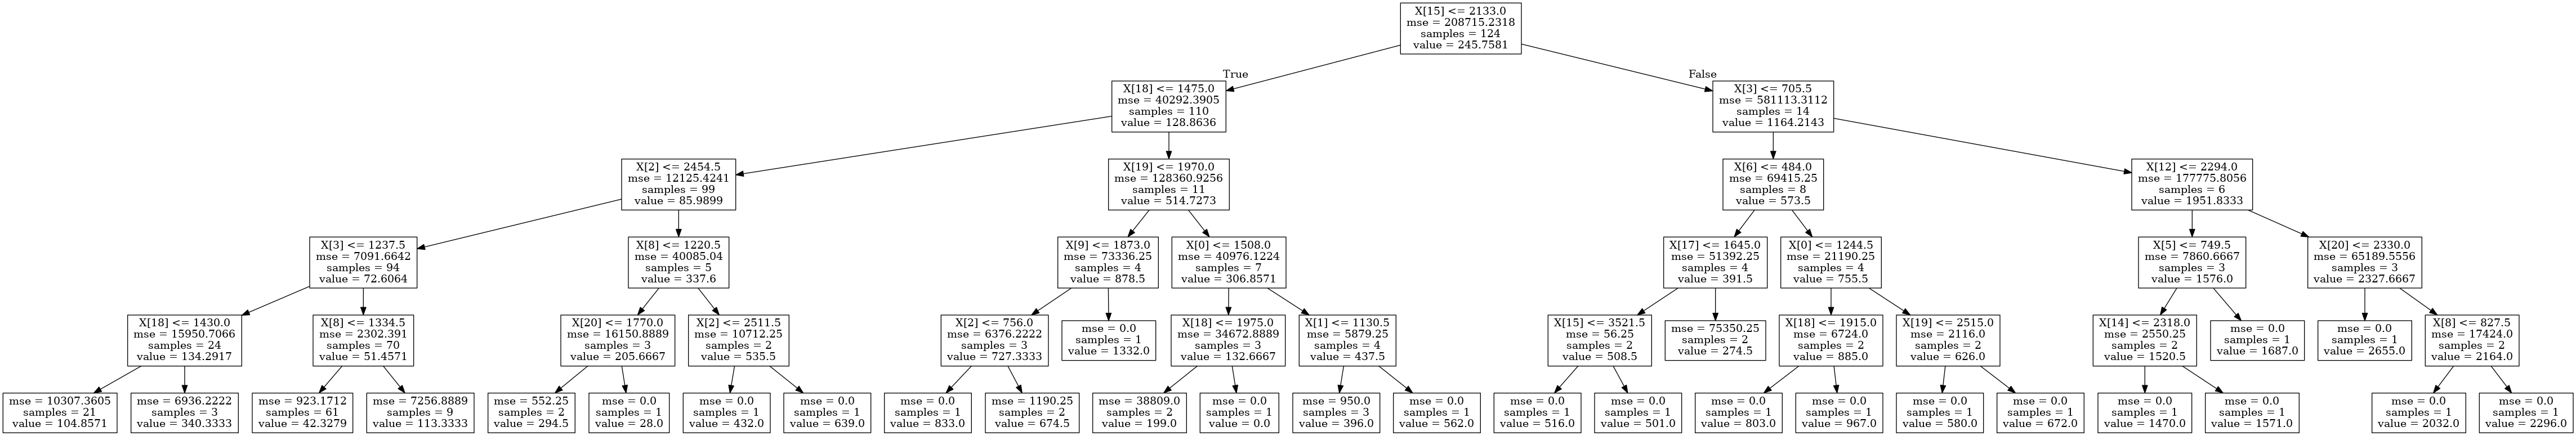

In [78]:
tmodel = fit_tree(X_train, Y_train, 5)
display_tree(tmodel)

In [79]:
pd.DataFrame(tmodel.feature_importances_, X_train.columns)

,0
0,0.008952
10,0.000817
15,0.014693
20,0.262435
25,0.000000
30,0.000731
35,0.010479
40,0.000000
45,0.008104
50,0.010844


Not much going on here, but we gotta do something

In [80]:
importances = tmodel.feature_importances_
important = [i for i in range(len(importances)) if importances[i] > 0.1]

In [81]:
decisiontreeFeatures=X_train.columns[important]

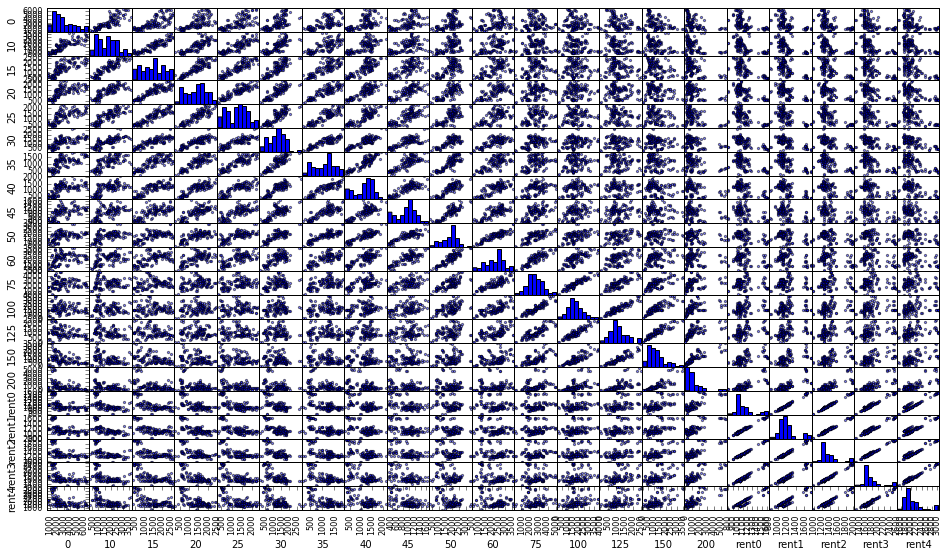

In [82]:
pd.scatter_matrix(X_train, figsize=(16,9))
plt.show()

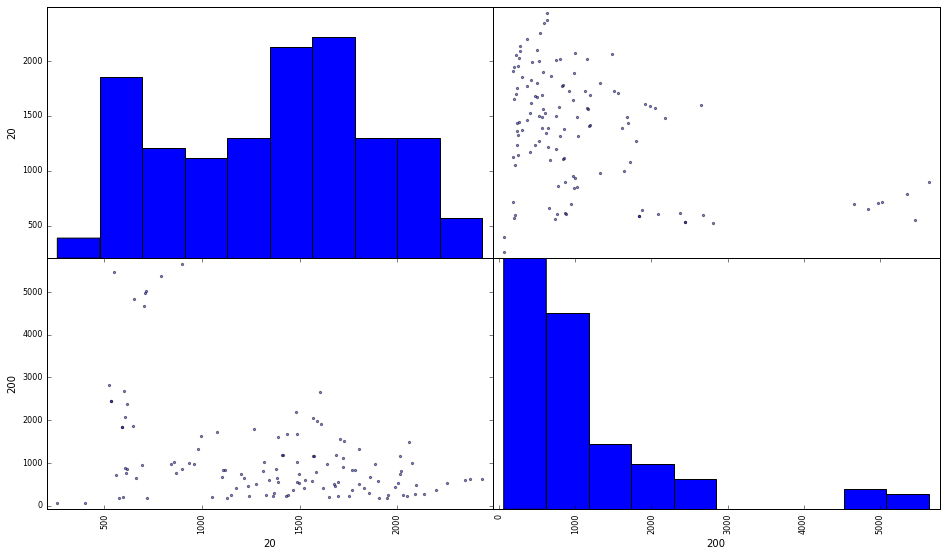

In [83]:
pd.scatter_matrix(X_train[decisiontreeFeatures], figsize=(16,9))
plt.show()

In [84]:
legit = get_data_and_target(df0, decisiontreeFeatures, target)

In [85]:
legit["data"].head()

,20,200
0,1755,228
1,1175,404
2,1274,518
3,1239,234
4,1908,175


In [86]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_knn = KNeighborsClassifier(n_neighbors=20)
clf_log = LogisticRegression(C=1e5)
clf_lin = LinearRegression()
clf_rnf = RandomForestClassifier(n_estimators=100)

In [87]:
cv=4

In [88]:
scores_svm = cross_val_score(clf_svm, legit["data"].values, legit["target"].values, cv=cv)
scores_knn = cross_val_score(clf_knn, legit["data"].values, legit["target"].values, cv=cv)
scores_log = cross_val_score(clf_log, legit["data"].values, legit["target"].values, cv=cv)
scores_lin = cross_val_score(clf_lin, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf = cross_val_score(clf_rnf, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf_all_vectors = cross_val_score(clf_rnf, temp["data"].values, temp["target"].values, cv=cv)


/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-pack

In [89]:
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf.mean(), scores_rnf.std() * 2))
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf_all_vectors.mean(), scores_rnf_all_vectors.std() * 2))

Accuracy SVM: 0.01 (+/- 0.03)
Accuracy KNN: 0.03 (+/- 0.07)
Accuracy LOG: 0.04 (+/- 0.08)
Accuracy LIN: 0.38 (+/- 0.05)
Accuracy RNF: 0.03 (+/- 0.07)
Accuracy RNF: 0.00 (+/- 0.02)


> All of these are bad for our data

> rent and income have no influence in trips. But, let's use linear

In [90]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split_pd(legit["data"], legit["target"], 0.8)

In [91]:
lin = clf_lin.fit(X1_train.values, Y1_train.values)

In [92]:
predicted_lin = lin.predict(X1_test.values)

In [95]:
print("Test VS Linear Predictions")
pd.DataFrame(predicted_lin, Y1_test.values)

Test VS Linear Predictions


,0
25,169.801087
1332,245.114250
21,88.025848
396,385.819895
54,171.722336
26,131.592099
11,38.959541
16,31.770049
53,209.598901
1571,1073.892663


> Rent and income have no effect on the number of trips in an area.

> But what about rent prices? Are they affected by incomes in an area?

In [96]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,125,150,200,State,CountyName,rent0,rent1,rent2,rent3,rent4
0,90,11221,2011,27089,4485,2010,1894,1755,1740,1188,...,901,693,228,36,Kings County,1040,1110,1250,1550,1720
1,144,11216,2011,22274,3253,1734,1255,1175,1273,1220,...,767,571,404,36,Kings County,1040,1110,1250,1550,1720
2,32,11233,2011,25595,5154,2182,1626,1274,1405,1226,...,808,536,518,36,Kings County,1040,1110,1250,1550,1720
3,30,11213,2011,23257,4364,2028,1668,1239,1487,1060,...,604,516,234,36,Kings County,1040,1110,1250,1550,1720
4,14,11212,2011,30024,6678,3026,2311,1908,2227,1770,...,401,465,175,36,Kings County,1040,1110,1250,1550,1720


In [97]:
df0['Rent_Mean'] = df0[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df0['Rent_Median'] = df0[["rent0", "rent1","rent2", "rent3","rent4"]].median(numeric_only=True,axis=1)

In [98]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,200,State,CountyName,rent0,rent1,rent2,rent3,rent4,Rent_Mean,Rent_Median
0,90,11221,2011,27089,4485,2010,1894,1755,1740,1188,...,228,36,Kings County,1040,1110,1250,1550,1720,1334.0,1250.0
1,144,11216,2011,22274,3253,1734,1255,1175,1273,1220,...,404,36,Kings County,1040,1110,1250,1550,1720,1334.0,1250.0
2,32,11233,2011,25595,5154,2182,1626,1274,1405,1226,...,518,36,Kings County,1040,1110,1250,1550,1720,1334.0,1250.0
3,30,11213,2011,23257,4364,2028,1668,1239,1487,1060,...,234,36,Kings County,1040,1110,1250,1550,1720,1334.0,1250.0
4,14,11212,2011,30024,6678,3026,2311,1908,2227,1770,...,175,36,Kings County,1040,1110,1250,1550,1720,1334.0,1250.0


In [99]:
income_cols = ["0", "10", "15", "20", "25", "30", "35", "40", "45", "50", "60", "75", "100", "125", "150", "200"]
target_rent = "Rent_Mean"

In [100]:
temp_income = get_data_and_target(df0, income_cols, target_rent)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.8)

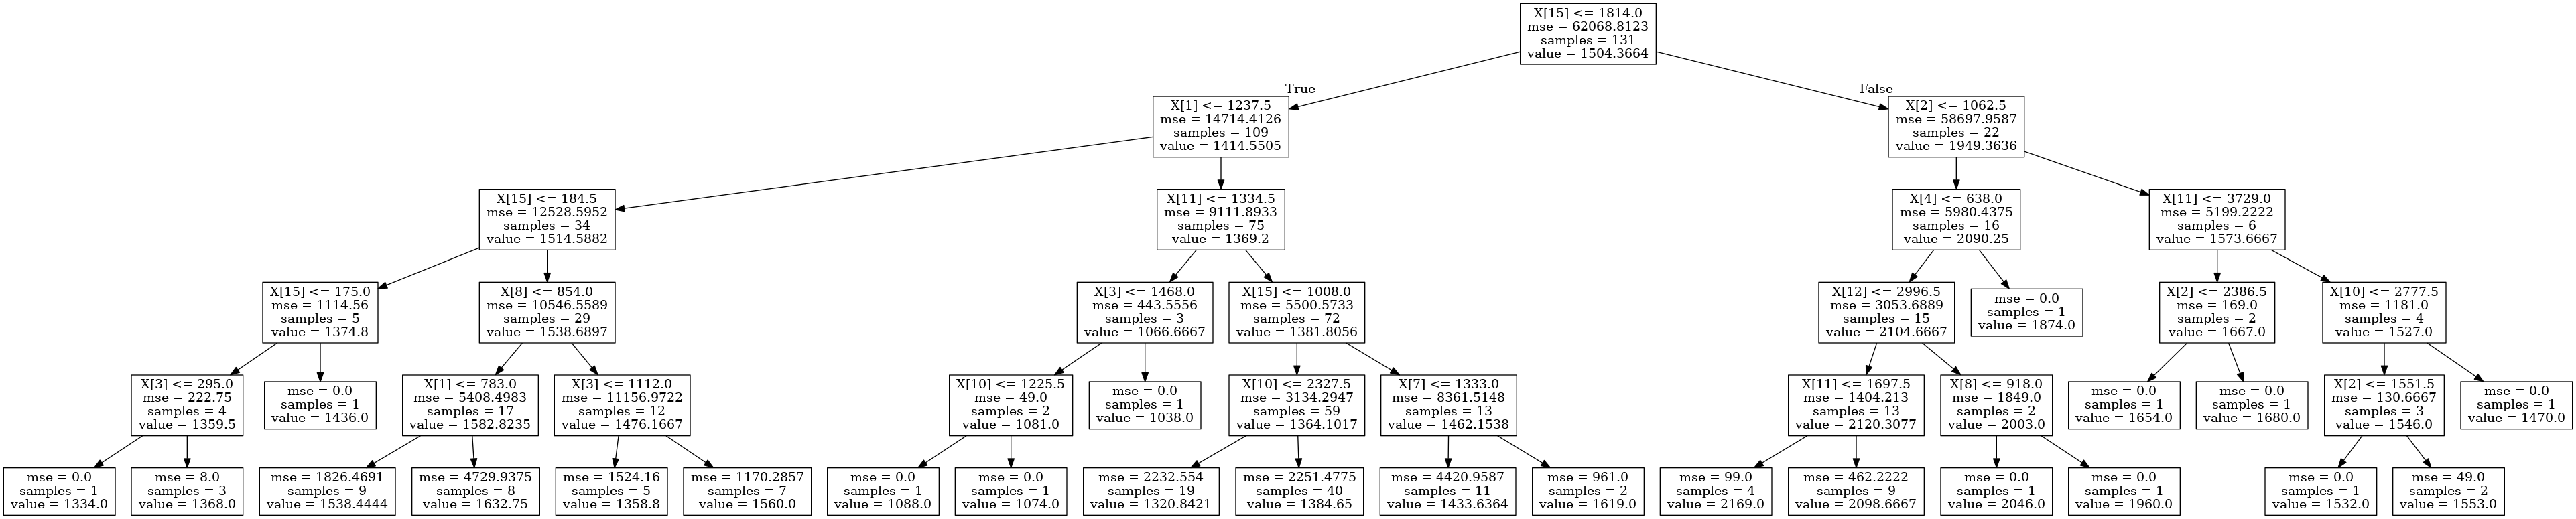

In [102]:
tmodel = fit_tree(X_train, Y_train, 5)
display_tree(tmodel)

In [103]:
pd.DataFrame(tmodel.feature_importances_, X_train.columns)

,0
0,0.000000
10,0.067593
15,0.147983
20,0.015263
25,0.006336
30,0.000000
35,0.000000
40,0.007385
45,0.010634
50,0.000000


In [104]:
importances = tmodel.feature_importances_
important = [i for i in range(len(importances)) if importances[i] > 0.1]
decisiontreeFeatures=X_train.columns[important]
decisiontreeFeatures

Index(['15', '200'], dtype='object')

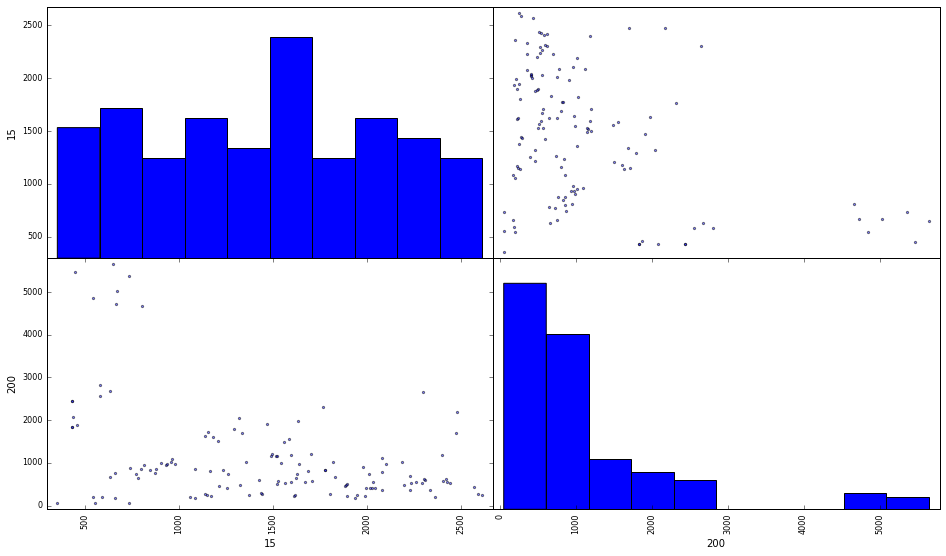

In [105]:
pd.scatter_matrix(X_train[decisiontreeFeatures], figsize=(16,9))
plt.show()

In [106]:
legit = get_data_and_target(df0, decisiontreeFeatures, target)
legit["data"].head()

,15,200
0,1894,228
1,1255,404
2,1626,518
3,1668,234
4,2311,175


In [107]:
scores_svm = cross_val_score(clf_svm, legit["data"].values, legit["target"].values, cv=cv)
scores_knn = cross_val_score(clf_knn, legit["data"].values, legit["target"].values, cv=cv)
scores_log = cross_val_score(clf_log, legit["data"].values, legit["target"].values, cv=cv)
scores_lin = cross_val_score(clf_lin, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf = cross_val_score(clf_rnf, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf_all_vectors = cross_val_score(clf_rnf, temp_income["data"].values, temp_income["target"].values, cv=cv)

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-pack

In [108]:
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf.mean(), scores_rnf.std() * 2))
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf_all_vectors.mean(), scores_rnf_all_vectors.std() * 2))

Accuracy SVM: 0.12 (+/- 0.20)
Accuracy KNN: 0.07 (+/- 0.14)
Accuracy LOG: 0.15 (+/- 0.22)
Accuracy LIN: 0.40 (+/- 0.05)
Accuracy RNF: 0.03 (+/- 0.08)
Accuracy RNF: 0.11 (+/- 0.08)


In [109]:
scores_svm = cross_val_score(clf_svm, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_knn = cross_val_score(clf_knn, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_log = cross_val_score(clf_log, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_lin = cross_val_score(clf_lin, temp_income["data"].values, temp_income["target"].values, cv=cv)
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Accuracy SVM: 0.09 (+/- 0.05)
Accuracy KNN: 0.15 (+/- 0.23)
Accuracy LOG: 0.14 (+/- 0.06)
Accuracy LIN: 0.73 (+/- 0.09)


In [112]:
decisiontreeFeatures

Index(['15', '200'], dtype='object')

### Linear regression does better with all of the columns than with just a few "important ones"

> :D

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.8)
lin = clf_lin.fit(X_train.values, Y_train.values)
predicted_lin = lin.predict(X_test.values)

In [136]:
X = X_test['15'].values
Y = X_test['200'].values
Z_pred = predicted_lin
Z_test = Y_test.values

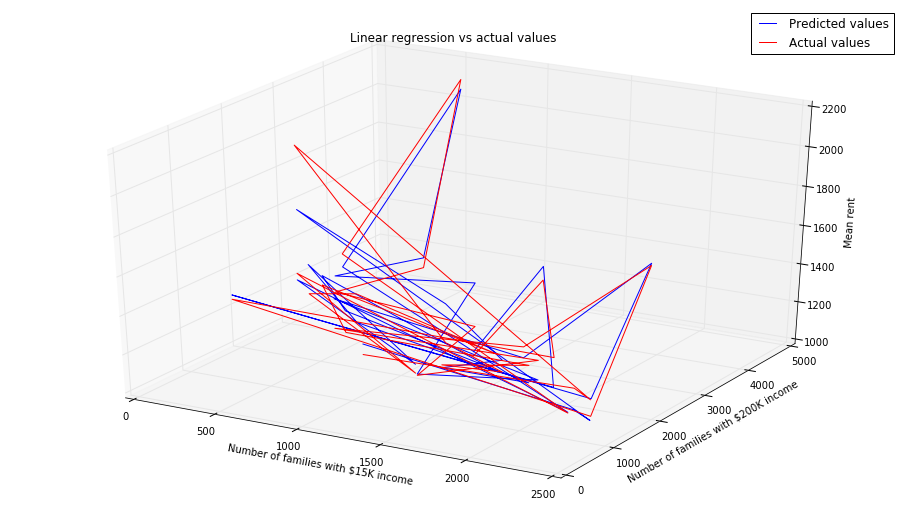

In [139]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $15K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

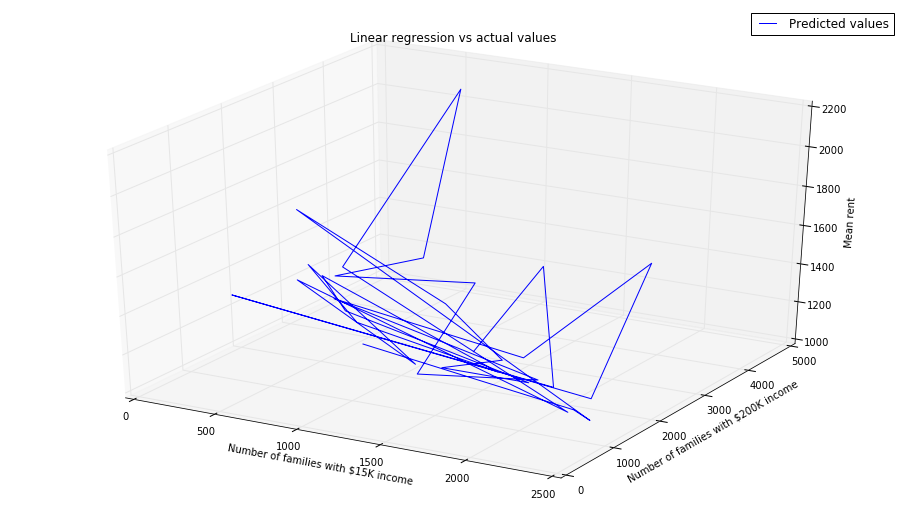

In [140]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.legend()
plt.xlabel("Number of families with $15K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

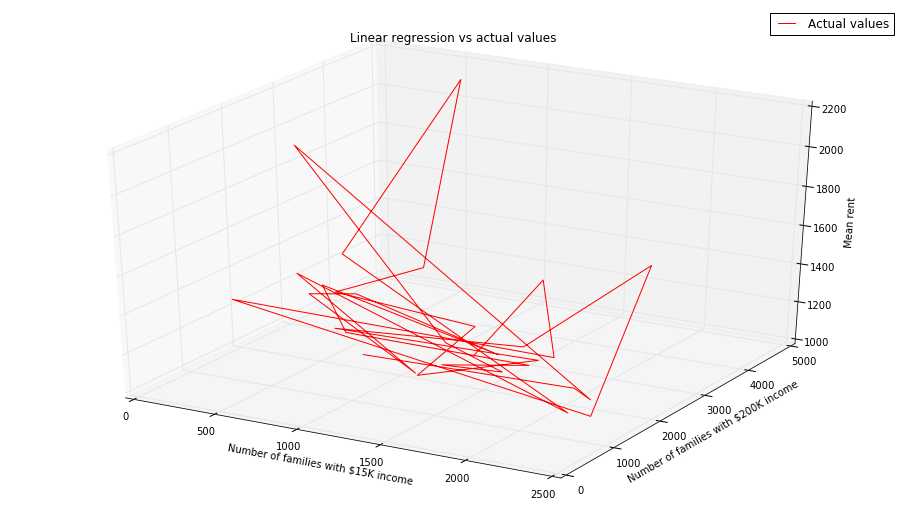

In [141]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $15K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

### Let's try median

In [142]:
temp_income = get_data_and_target(df0, income_cols, "Rent_Median")

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.8)
tmodel = fit_tree(X_train, Y_train, 5)
display_tree(tmodel)
importances = tmodel.feature_importances_
important = [i for i in range(len(importances)) if importances[i] > 0.1]
decisiontreeFeatures=X_train.columns[important]
decisiontreeFeatures

Index(['40', '200'], dtype='object')

In [144]:
legit = get_data_and_target(df0, decisiontreeFeatures, target)

In [145]:
scores_svm = cross_val_score(clf_svm, legit["data"].values, legit["target"].values, cv=cv)
scores_knn = cross_val_score(clf_knn, legit["data"].values, legit["target"].values, cv=cv)
scores_log = cross_val_score(clf_log, legit["data"].values, legit["target"].values, cv=cv)
scores_lin = cross_val_score(clf_lin, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf = cross_val_score(clf_rnf, legit["data"].values, legit["target"].values, cv=cv)
scores_rnf_all_vectors = cross_val_score(clf_rnf, temp_income["data"].values, temp_income["target"].values, cv=cv)
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-pack

Accuracy SVM: 0.00 (+/- 0.01)
Accuracy KNN: 0.07 (+/- 0.14)
Accuracy LOG: 0.01 (+/- 0.03)
Accuracy LIN: 0.38 (+/- 0.05)


In [146]:
scores_svm = cross_val_score(clf_svm, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_knn = cross_val_score(clf_knn, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_log = cross_val_score(clf_log, temp_income["data"].values, temp_income["target"].values, cv=cv)
scores_lin = cross_val_score(clf_lin, temp_income["data"].values, temp_income["target"].values, cv=cv)
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Accuracy SVM: 0.12 (+/- 0.04)
Accuracy KNN: 0.24 (+/- 0.22)
Accuracy LOG: 0.10 (+/- 0.05)
Accuracy LIN: 0.73 (+/- 0.09)


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.8)
lin = clf_lin.fit(X_train.values, Y_train.values)
predicted_lin = lin.predict(X_test.values)
X = X_test['40'].values
Y = X_test['200'].values
Z_pred = predicted_lin
Z_test = Y_test.values

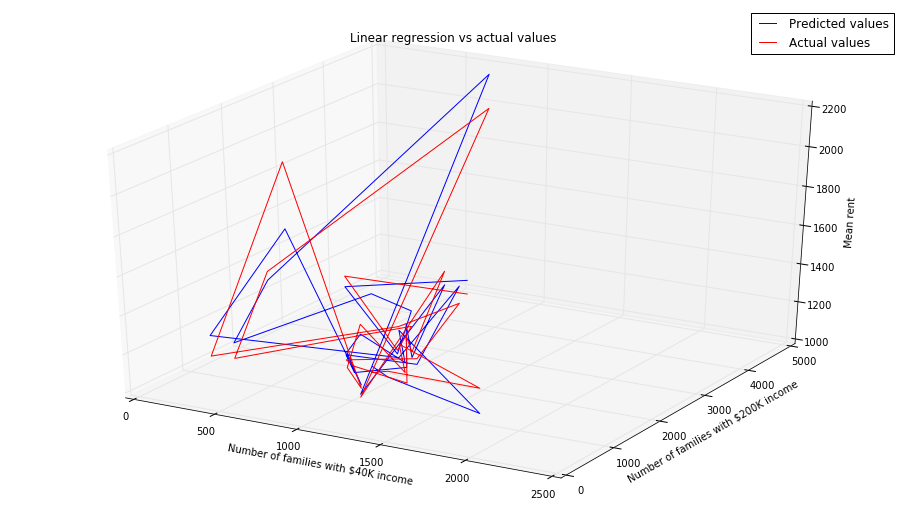

In [148]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

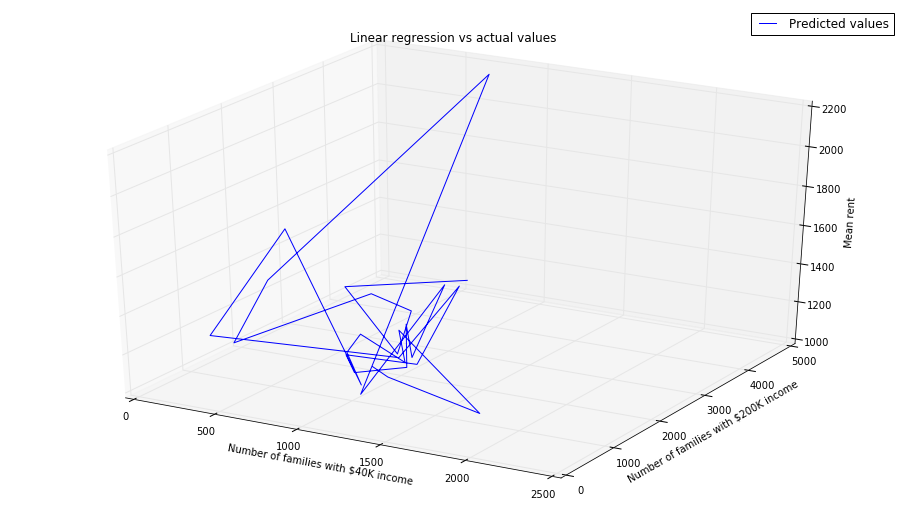

In [149]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

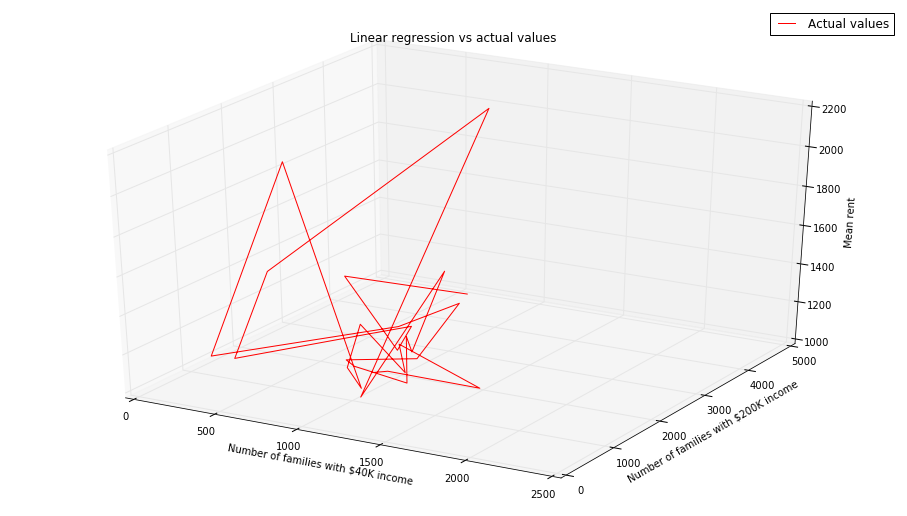

In [150]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

## let's use this model for Queens

In [153]:
df1 = pd.read_csv("data/QN_final.csv", index_col=0)
df1['Rent_Mean'] = df1[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df1['Rent_Median'] = df1[["rent0", "rent1","rent2", "rent3","rent4"]].median(numeric_only=True,axis=1)

In [154]:
temp_income = get_data_and_target(df1, income_cols, "Rent_Median")
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.8)
predicted_lin = lin.predict(X_test.values)
X = X_test['40'].values
Y = X_test['200'].values
Z_pred = predicted_lin
Z_test = Y_test.values

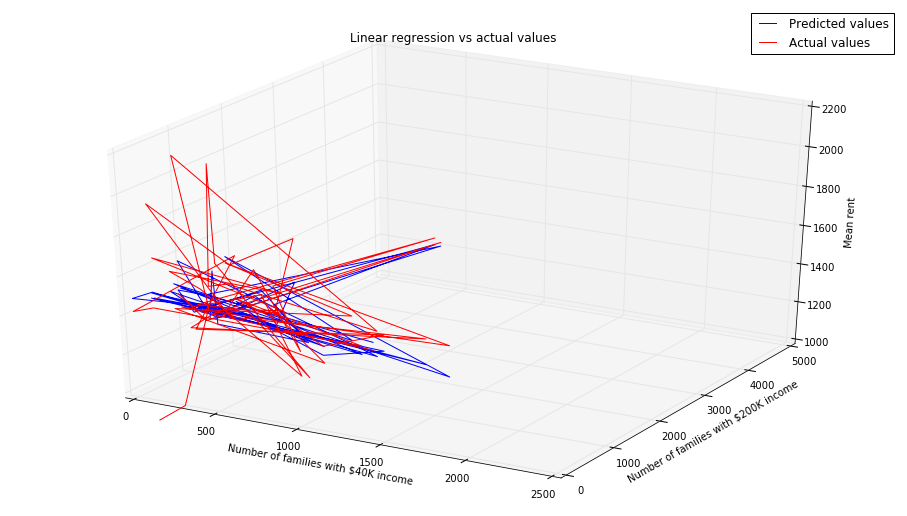

In [155]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

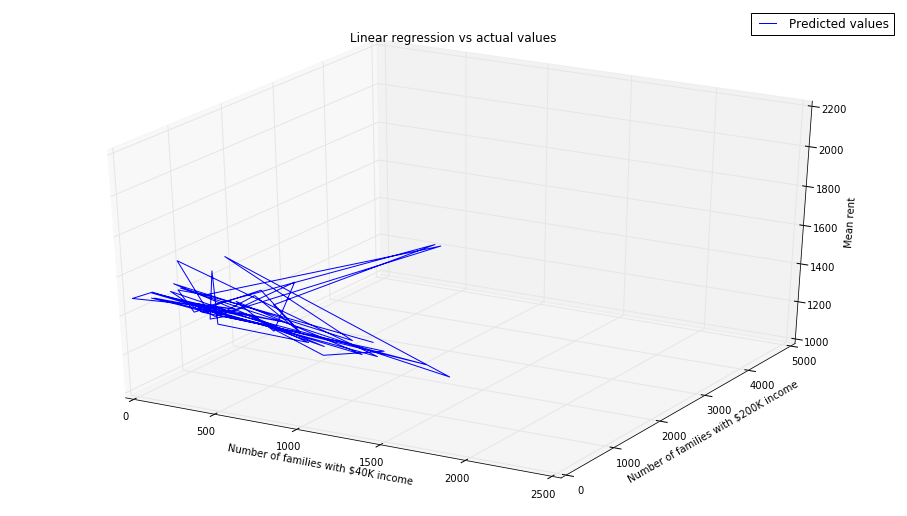

In [156]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_pred, label='Predicted values', color='b')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()

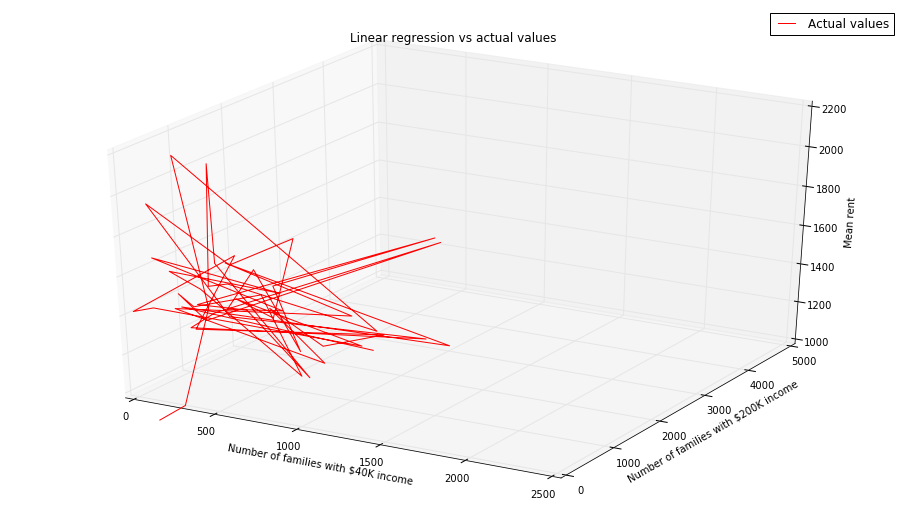

In [157]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z_test, label='Actual values', color='r')
ax.legend()
plt.xlabel("Number of families with $40K income")
plt.ylabel("Number of families with $200K income")
ax.set_zlabel("Mean rent")
plt.title("Linear regression vs actual values")
#plt.xlim(0, 2500)
#plt.ylim(-1000,5000)
ax.set_zlim(1000,2200)
ax.set_xlim(0,2500)
ax.set_ylim(0,5000)

plt.show()